<a href="https://colab.research.google.com/github/Avit-hodibu/Regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression



**Perceptron trick:**
what is does is it will ask point that is he in right track. if not then change the poistion of line and make sure that he is on right track. This loop or converge keep happaning

How to label regions?

Ax+By+C=0

in this equation we try to fit the point. If Ax+By+C > 0 then point in  positive region and if less than 0 then neg and if equal to 0 then point lies in line


How does it transform the line?

Ax+By+C=0

if you change C then the line will move parallel up and down. C is increase it go down and C decrease it go up.

if change in A coef it will rotate. A coef increase then it rotate to clockwise and coef decrease then will mover anti-clockwise. but Y point remain fix

if change in B coef it will rotate. B coef increase then it rotate to anti clockwise and coef decrease then will mover clockwise. but X point remain fix

We need to apply transformation for error point (data)

move up then subtrace with the coef of with data puting 1 for C coef sub.
For eg: equ 2x+3y+5 = 0 and data (4,5) gives 2-4= -2, 3-5= -2, 5-1 =4 this give -2x+-2y+4 = 0

move down then add with coef of data puting 1 for C coef add.

coef new = coef old - learning rate * coordinate





W0 + W1 X1 + W2 X2 =0

X0 = 1 in all col

sum i to n WiXi= 0

 if row=i WiXi>=0 then 1 else 0

```
for i in range(epochs):
    if  Xi E N (according to data it is 0 means no)and sum i to 2 WiXi>= 0(according to model it is 1 means yes)
```
then we update our coef W by:

W new = W old - learning rate * Xi
```
again
for i in range(epochs):
    if  Xi E P (according to data it is 1 means yes)and sum i to 2 WiXi< 0(according to model it is 0 means no)

```
then we update our coef W by

W new = W old + learning rate * Xi

Algo:
we directly use this
```
for i in range(epochs)
  W new = W old - learning rate *(Yi - Yi hat)* Xi
```

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

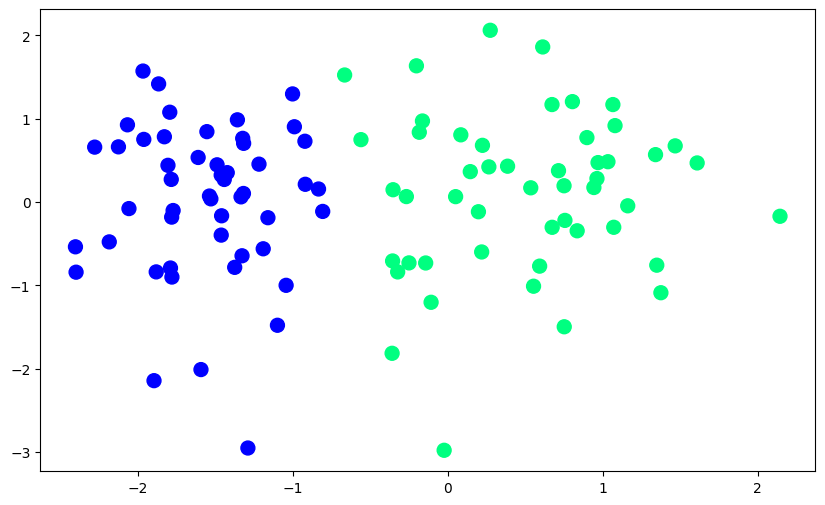

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):
    # add X0=1 in each row
    X = np.insert(X,0,1,axis=1)
    # make all three W = 1
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
      #select random row from dataset
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]
#check true or false
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.30874105 0.20537252]
0.9


In [ ]:
# Ax+By+C=0
#y=mx +c
# for making linear line to divide the data
m = -(coef_[0]/coef_[1]) #m = -A/B
b = -(intercept_/coef_[1]) #b = - C/B

(-3.0, 2.0)

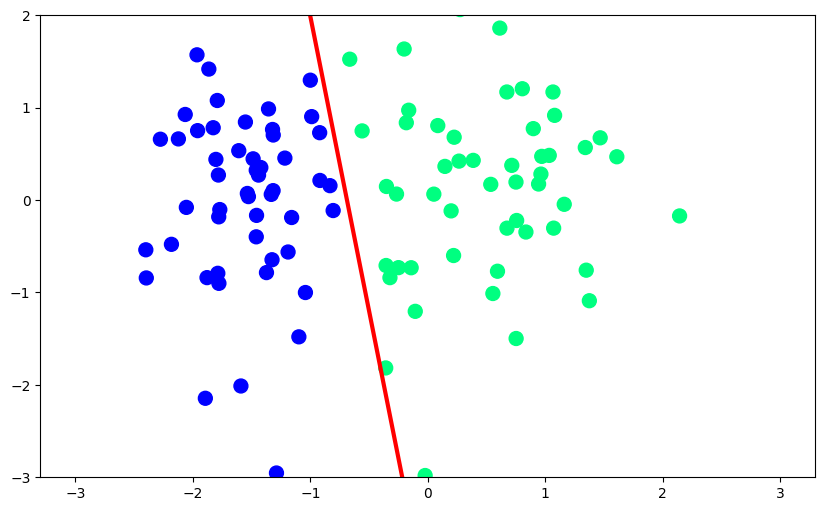

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

**Using Logistic Regression**
this give the best model. but in perceptron , it will stop after seperating the data. It will not try to improve

(-3.0, 2.0)

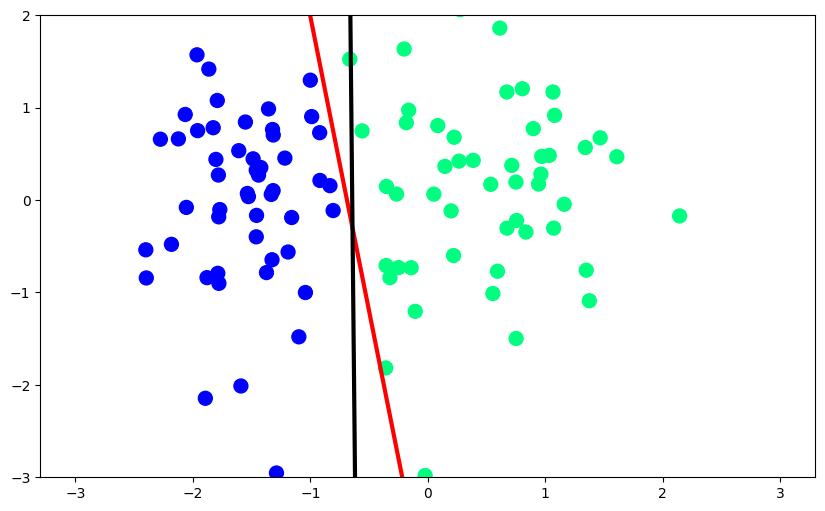

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

What does logistic regression do to be better than perceptron?

- misclassified pull the line
- correct push the line

in misclassified, more the magnitude between line and point more stronger it will pull and vice-versa

in correctly classified, just opposite of misclassified. lesser the magnitude between line and point more stronger it will pull and vice-versa


Wn = Wo + learning rate .( Yi -Yi hat) Xi

step function(Yi hat) is discrete. It give 0 or 1. When step function and Yi is same then it is 0 then Wn = Wo.

So, We are going to replace our output machanism. For this we have sigmoid.

**Sigmoid function**:
 sigmoid(Z)=y=1/(1+e^(-z))
https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1024px-Logistic-curve.svg.png

-infinity < Z < infinity

0 < y < 1

It scale down massive number to 0 to 1.

sigmoid(Z) = sum WiXi
  
If it is positive than it's value is greater than or equal to 0.5. this is 1.If neg than less than 0.5. this is 0.  

sigmoid = 0.5 means probablity(0.5). This means probablity of yes or True = 0.5

Farther the point from 0.5 higher the probablity. Now, what happen is that everyone have the probality of yes and no, no matter how far are they from limit line

Z= wixi

 proba(yes)=sigmoid(Z)=y=1/(1+e^(-z))

 proba(no)= 1- proba(yes)

 y hat = proba(yes)

 Now, since proba(yes) will never be 0. this n (Yi - Yihat)Xi will not be 0. we can put value in

 Wnew = Wold + n (Yi - Yihat)Xi

when (Yi - Yihat) is positive it will pull. It means incorrect. When negative it will push. It mean cor
  Wnew = Wold + n (Yi - Yihat)Xi





**instead of step we use sigmoid**

(-3.0, 2.0)

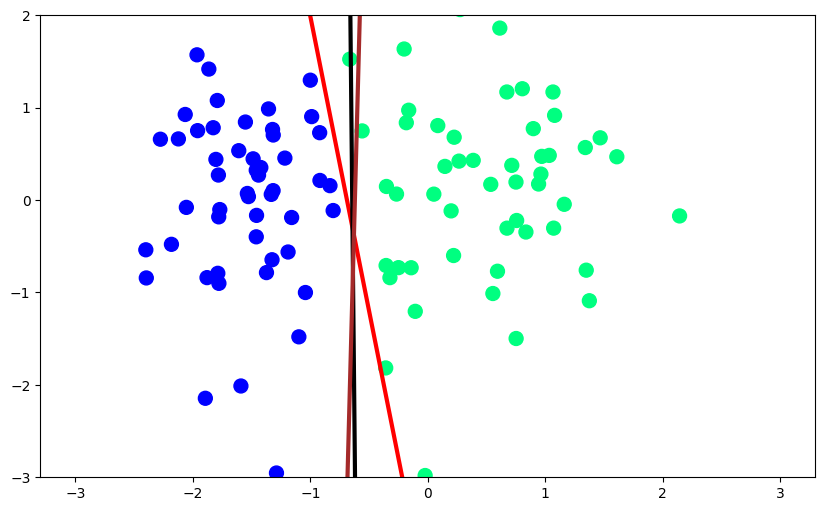

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

intercept_,coef_ = perceptron(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


Still logistic regression is performing best.

Why??
- we are not searching loss function.


 Maximum Likelihood:

 y hat = sigmoid(Z), Z= sum wi Xi

 take prob of each point which is true self of that point. prob will be log(p) with sum all point prob. this give the maximum likelihood of model.

 From this we can compare between the models. we need max.

 = sum( log(prob(Xi)))

 since prob will be between 0-1 and will give value between 0-1. this give value in -ve when we do log we need to do other  way

 i.e.= sum(- log(prob(Xi)))

 this is called cross-entropy. Max likelihood log negative summation then it is cross-entropy.

 We need to minimized the value in cross-entropy.






we need to use this:

Loss function (L)=-yi log(yi hat) -(1-yi)log(1-yi hat)

when yi=0 then  -log(1-yi hat),

when yi=1 then -log(yi hat)

for average loss fun:

=(1/n)sum i to n -yi log(yi hat) -(1-yi)log(1-yi hat)

= -(1/n)sum i to n yi log(yi hat) +(1-yi)log(1-yi hat)

This is called log loss error or binary cross entropy

To find the solution we need to use gradient des


derivative of sigmoid(x)=d(sigmoid(x))/dx= sigmoid(x)[1- sigmoid(x)]

```
y hat = [y1 hat = [sigmoid(w0 + w1x11 + w2x12 + ......+ wnx1n)]
        
        y2 hat    [sigmoid(w0 + w1x21 + w2x22 + ......+ wnx2n)]
        
        .         .

        .         .
        ym hat]   [sigmoid(w0 + w1x31 + w2x32 + ......+ wnx3n)]
```

```
y hat = sigmoid([1 X11 ............X1n] [w0 ]
                [1 X21 ............X2n] [w1 ]

                [1 X31 ............X3n] [w0 ]

                .
                .
                .
                [1 Xm1 ............Xmn] [wn ])  

y hat = sigmoid(XW)

```

L= - (1/n)sum i to n yi log(yi hat) + (1-yi)log(1-yi hat)

L = (-1/m)[Y logY hat + (1-Y) log(1-Y hat)] where Y hat = sigmoid(XW)

Now, we need to use gradient descent and find W matrix for which loss function should be minimum.



What do we do??

- we initallized w value with random value

- and we use loop of epochs in which we update W using W=W- learning rate (del L/ del W)

(del L/ del W)= [(del L/ del W0), (del L/ del W1), ........ , (del L/ del Wn)]

L = (-1/m)[Y logY hat + (1-Y) log(1-Y hat)]

this give:

(del L/ del W) = Y(1- Y hat)X


del (1-Y) log(1-Y hat)/ del W= -Y hat (1-Y)X

(del L/ del W)= -(1/m)[Y(1- Y hat)X -Y hat (1-Y)X]

= -(1/m)[Y- Y hat]X

according to gradient descent we have this formula for update:

W= W +  learning rate * (1/m)[Y- Y hat]X

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)


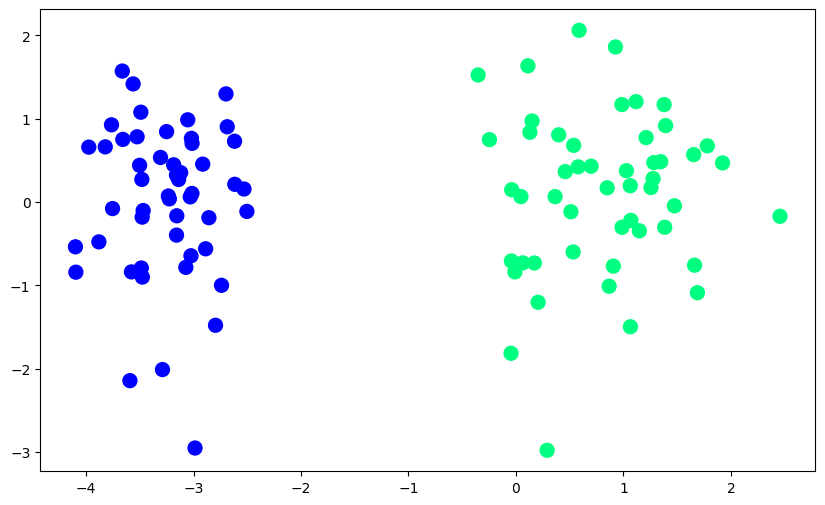

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='sag')
lor.fit(X,y)


LogisticRegression(solver='sag')

In [ ]:
print(lor.coef_)
print(lor.intercept_)

[[2.36849041 0.02141106]]
[3.14031285]


In [ ]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [ ]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

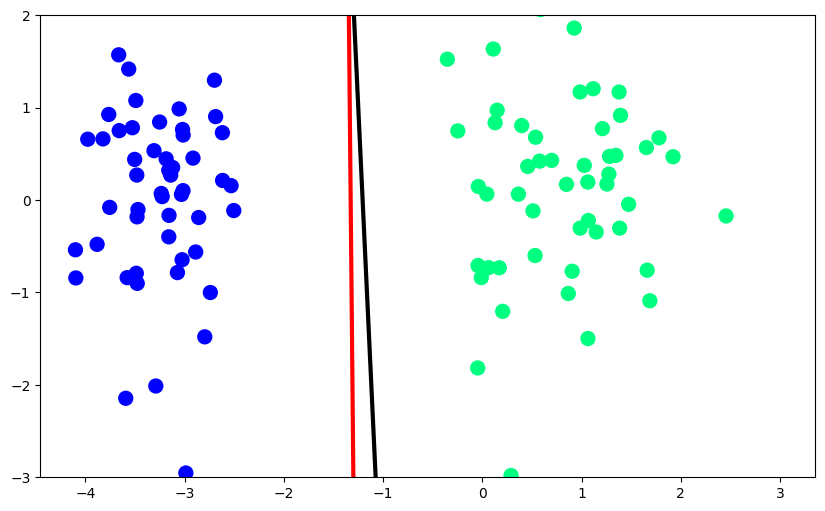

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Metrics:


## Accuracy:

no of correct prediction / total prediction



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test,y_pred1)) # provide answer between 0 - 1
# how well it predict

How much accuracy is  good?

-> it depend on model. If it is more risk case it need to more accurate.

The problem of accuracy score: It doesnt tell the type of mistake model is making. For eg:

If model is prediction is True but the real answer is False.

If model is prediction is False but the real answer is True.

This type of mistake canot be figure out by accuracy score.

For this we use confusion Maxtrix



**confusion Maxtix**
It tell the nature of the matrix

prediction:

TP        FN(not)  they have (1) actual

FP(not)    TN    they donot have (0) actual

first (actual), second(predicted)

acc = TP +TN/(TP+TN+FP+FN)

Type I error= F(actual)P(predicted)

Type II error= T(actual)N(predicted)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion_matrix",confusion_matrix(y_test,y_pred1))
#it give array of 2*2 matrix

When accuracy is misleading?

-> Imbalance data set = the ratio between type of class is not balance.  

When data is imbalance data set then we use precision and recall.

## Precision:
what proportion of predicted Positive is truly Positive?

We will choose model according to importance. For eg: if there is email to predict spam or not. We will choose model where it less chance of predicting
not spam  to spam message rather than predicting spam to non spam message. Because getting message is more important than predicting spam.

Precision = TP/(TP+FP)

We select model where precision high.

For Type I error = Precision






## Recall:
What proportion of actual Positives is correctly classified?

For e.g:
if there is cancer or not. who have cancer but not detected is more dangerous than detected cancer who does not have. That means FN is more dangerous.  We deploy the another model who have less FN.

This model is called Recall

Recall = TP/(TP + FN)

We selecte the model who has high recall.

For Type II error = Recall

## F1 score:

When we dont know type I or II is more dangerous. There always trade off between precision and recall. So, we use F1 score where we find average between precision and recall.